In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !pip install shap
    !pip install pdpbox

     |████████████████████████████████| 102kB 2.4MB/s 
     |████████████████████████████████| 153kB 2.7MB/s 
     |████████████████████████████████| 614kB 8.0MB/s 
     |████████████████████████████████| 235kB 12.5MB/s 
     |████████████████████████████████| 307kB 12.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 215kB 11.4MB/s 
     |████████████████████████████████| 747kB 16.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.4.0-py2.py3-none-any.whl size=195588 sha256=9c27b52559afb2c4b35682eb474b212dd9a096e17826b2a2d583a037347fb552
  Stored in directory: /root/.cache/pip/wheels/b2/4b/40/ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=8e69b34bcafa3a94cf206e9d1b2b2c3528c694e17c855d6491c6e4d6f1373e72
  Stored in directory: /root/.cache/pip/wheels/b0/b2/96/2074eee7dbf7

In [0]:
import pandas as pd

In [0]:
term116=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-116.csv')
term115=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-115.csv')
term114=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-114.csv')
term113=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-113.csv')
term112=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-112.csv')
term111=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-111.csv')
term110=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-110.csv')
term109=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-109.csv')
term108=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-108.csv')
term107=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-107.csv')
term106=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-106.csv')
term105=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-105.csv')
term104=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-104.csv')
term103=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-103.csv')
term102=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-102.csv')
term101=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-101.csv')
term100=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-100.csv')
term99=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-99.csv')
term98=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-98.csv')


In [0]:
df=pd.concat([term98, term99, term100, term101, term102, term103, term104, term105,
           term106, term107, term108, term109, term110, term111, term112,
           term113, term114, term115, term116
], ignore_index=True)

In [5]:
df.head()

,id,name,sort_name,email,twitter,facebook,group,group_id,area_id,area,chamber,term,start_date,end_date,image,gender,wikidata,wikidata_group,wikidata_area
0,02059c1e-0bdf-4813-9135-260fd4b72237,"Abraham Kazen, Jr.","Kazen, Abraham",NaN,NaN,NaN,Democrat,democrat,TX-23,Texas's 23rd congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q330149,Q29552,Q7707374
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Alan Mollohan,"Mollohan, Alan",NaN,NaN,NaN,Democrat,democrat,WV-1,West Virginia's 1st congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q1234572,Q29552,Q7986804
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Alan Wheat,"Wheat, Alan",NaN,NaN,NaN,Democrat,democrat,MO-5,Missouri's 5th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q548596,Q29552,Q6879455
3,741bb69a-43e5-4273-9c21-1b152b305946,"Albert Gore, Jr.","Gore, Albert",NaN,algore,algore,Democrat,democrat,TN-6,Tennessee's 6th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q19673,Q29552,Q7699994
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Alfred McCandless,"McCandless, Alfred",NaN,NaN,NaN,Republican,republican,CA-37,California's 37th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q371675,Q29468,Q5020049


In [0]:
df=df.drop(columns=['email', 'chamber','image', 'wikidata', 'facebook', 'twitter', 'name', 'sort_name', 'id', 'wikidata_group', 'wikidata_area', 'start_date', 'end_date', 'area_id', 'group_id'])

In [7]:
df.shape

(8493, 4)

In [8]:
df.describe()

,term
count,8493.000000
mean,107.009890
std,5.477002
min,98.000000
25%,102.000000
50%,107.000000
75%,112.000000
max,116.000000


In [9]:
df.describe(exclude='number')

,group,area,gender
count,8493,8493,8493
unique,8,486,2
top,Democrat,Hawaii's 1st congressional district,male
freq,4452,22,7350


In [10]:
df['gender'].value_counts()

male      7350
female    1143
Name: gender, dtype: int64

In [11]:
df.gender.value_counts(normalize=True)

male      0.865419
female    0.134581
Name: gender, dtype: float64

In [12]:
df['gender']=df['gender']=='female'
df.gender.head()

0    False
1    False
2    False
3    False
4    False
Name: gender, dtype: bool

In [13]:
df.head()

,group,area,term,gender
0,Democrat,Texas's 23rd congressional district,98,False
1,Democrat,West Virginia's 1st congressional district,98,False
2,Democrat,Missouri's 5th congressional district,98,False
3,Democrat,Tennessee's 6th congressional district,98,False
4,Republican,California's 37th congressional district,98,False


In [14]:
df.rename(columns={'gender':'female'}, inplace=True)
df.head()

,group,area,term,female
0,Democrat,Texas's 23rd congressional district,98,False
1,Democrat,West Virginia's 1st congressional district,98,False
2,Democrat,Missouri's 5th congressional district,98,False
3,Democrat,Tennessee's 6th congressional district,98,False
4,Republican,California's 37th congressional district,98,False


In [15]:
# define majority class baseline
df.female.value_counts(normalize=True)

False    0.865419
True     0.134581
Name: female, dtype: float64

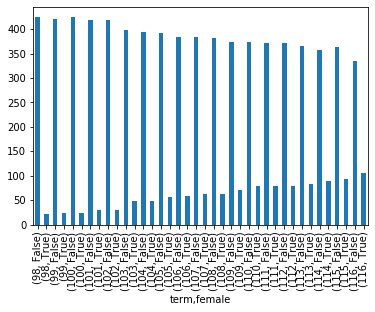

In [16]:
byterm=df.groupby('term')['female'].value_counts()
byterm.plot.bar(x='term', y='female');

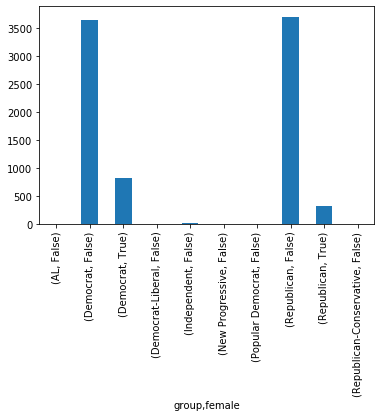

In [17]:
bygroup=df.groupby('group')['female'].value_counts()
bygroup.plot.bar(x='group', y='female');

In [18]:
# apply train/test split
from sklearn.model_selection import train_test_split
train, test=train_test_split(df, train_size=0.8)
train.shape, test.shape

((6794, 4), (1699, 4))

In [19]:
train, val=train_test_split(train, train_size=0.8)
train.shape, val.shape

((5435, 4), (1359, 4))

In [0]:
# arrange data into features matrix and target vector
# features=[]
target='female'
features=df.columns.drop(['female'])
xtrain=train.drop(columns='female')
ytrain=train[target]
xval=val.drop(columns='female')
yval=val[target]
xtest=test.drop(columns='female')
ytest=test[target]

In [21]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

encoder=ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(xtrain)
X_val_encoded = encoder.transform(xval)
X_test_encoded= encoder.transform(xtest)
# imputer=SimpleImputer(strategy='median')
# X_train_processed= imputer.fit_transform(X_train_encoded)
# X_val_processed=imputer.transform(X_val_encoded)
# X_test_processed=imputer.transform(X_test_encoded)

eval_set = [(X_train_encoded, ytrain), 
            (X_val_encoded, yval)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, ytrain, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.723029	validation_1-auc:0.692905
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.723036	validation_1-auc:0.701956
[2]	validation_0-auc:0.727162	validation_1-auc:0.710199
[3]	validation_0-auc:0.728673	validation_1-auc:0.712471
[4]	validation_0-auc:0.732234	validation_1-auc:0.716905
[5]	validation_0-auc:0.737961	validation_1-auc:0.714018
[6]	validation_0-auc:0.738456	validation_1-auc:0.713631
[7]	validation_0-auc:0.743037	validation_1-auc:0.722836
[8]	validation_0-auc:0.743005	validation_1-auc:0.722048
[9]	validation_0-auc:0.743322	validation_1-auc:0.722296
[10]	validation_0-auc:0.7449	validation_1-auc:0.725542
[11]	validation_0-auc:0.745496	validation_1-auc:0.723245
[12]	validation_0-auc:0.749885	validation_1-auc:0.724254
[13]	validation_0-auc:0.749889	validation_1-auc:0.723486
[14]	validation_0-auc:0.750421	validation_1-auc:0.723522


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
from sklearn.metrics import roc_auc_score
# X_test_encoded = encoder.transform(xtest)
class_index = 1
y_pred_proba = model.predict_proba(X_test_encoded)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(ytest, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.7087405899049735


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


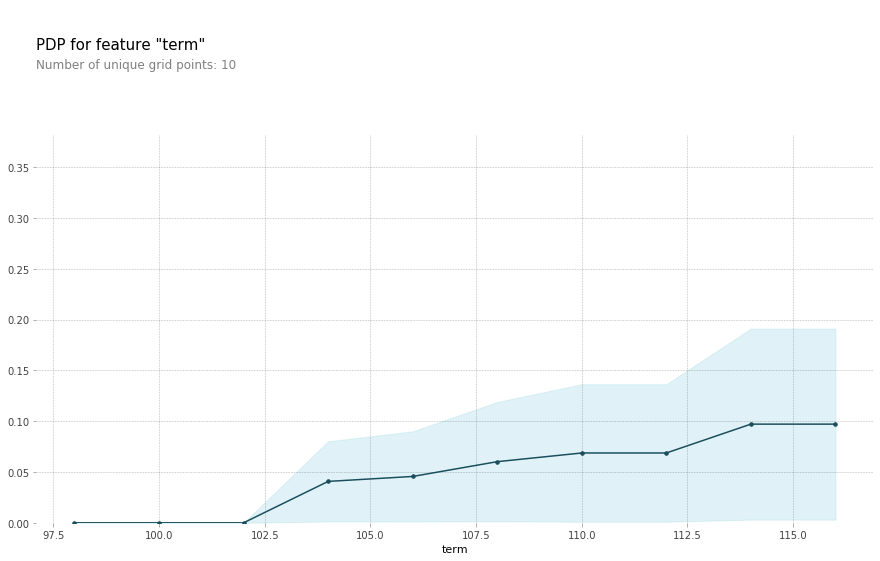

In [25]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'term'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

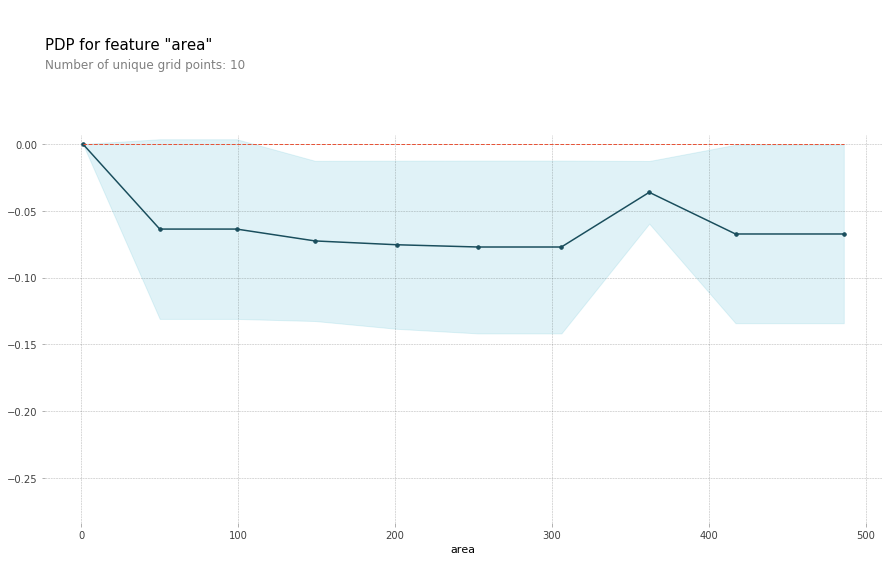

In [26]:
feature = 'area'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

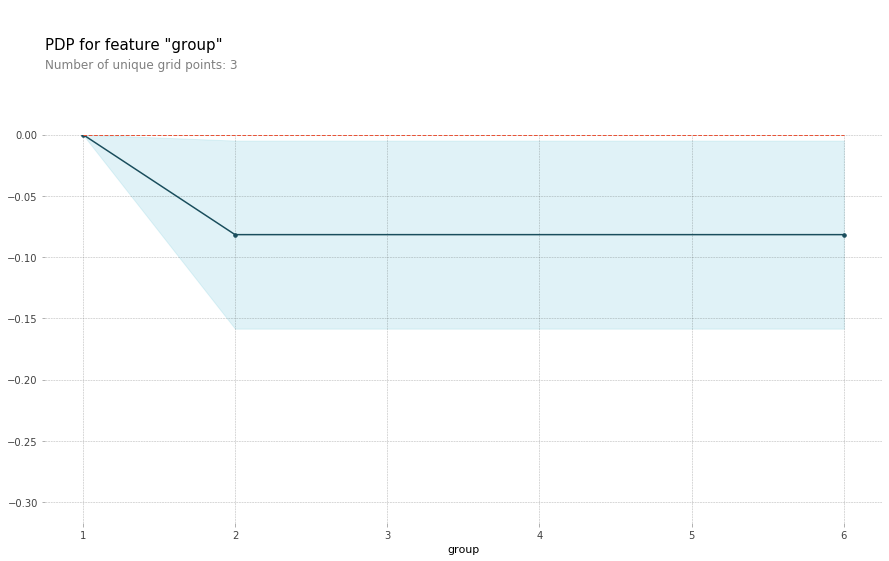

In [27]:
feature = 'group'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(xtrain, ytrain)
ypred = gb.predict(xval)
print('Gradient Boosting R^2', r2_score(yval, ypred))

Gradient Boosting R^2 0.24066179744647342


In [29]:
ytest.head(20)

1711    False
2357    False
2566    False
2205    False
6853    False
7692    False
2054    False
4447    False
3200    False
2229    False
5576    False
2897    False
1331    False
8086     True
790     False
6647    False
5517     True
2649    False
6020    False
5032    False
Name: female, dtype: bool

In [30]:
xtest.head(20)

,group,area,term
1711,Republican,California's 43rd congressional district,101
2357,Republican,South Carolina's 2nd congressional district,103
2566,Democrat,Texas's 4th congressional district,103
2205,Democrat,California's 11th congressional district,102
6853,Republican,Mississippi's 3rd congressional district,113
7692,Republican,Tennessee's 8th congressional district,115
2054,Republican,Texas's 19th congressional district,102
4447,Republican,Virginia's 5th congressional district,107
3200,Republican,Indiana's 6th congressional district,105
2229,Democrat,New Mexico's 3rd congressional district,102


In [37]:
row=xtest.iloc[[2]]
row

,group,area,term
2566,Democrat,Texas's 4th congressional district,103


In [38]:
import shap

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' # for classificaiton, shows predicted probabilities
)

In [39]:
row=xtest.iloc[[3]]

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' # for classificaiton, shows predicted probabilities
)

In [40]:
row=xtest.iloc[[13]]

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' # for classificaiton, shows predicted probabilities
)